In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
from utils.paths import DATA_RAW_DIR

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans

import ipywidgets as widgets
from IPython.display import display

In [2]:
path_jugadores = str(DATA_RAW_DIR / 'jugadores_cebollitas.csv')

print('Path:', path_jugadores)
print('Does path exist?', Path(path_jugadores).exists())


Path: /Users/jssdev/Dev/Learning/Platzi/platzi-machine-learning/data/raw/jugadores_cebollitas.csv
Does path exist? True


In [3]:
df_jugadores = pd.read_csv(path_jugadores, sep=',', encoding='utf-8')
df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047


In [4]:
df_jugadores.columns

Index(['jugador_id', 'nombre', 'posición', 'edad', 'partidos_jugados', 'goles',
       'asistencias', 'pases_completados (%)', 'tiros_al_arco',
       'precisión_tiros (%)', 'minutos_jugados'],
      dtype='object')

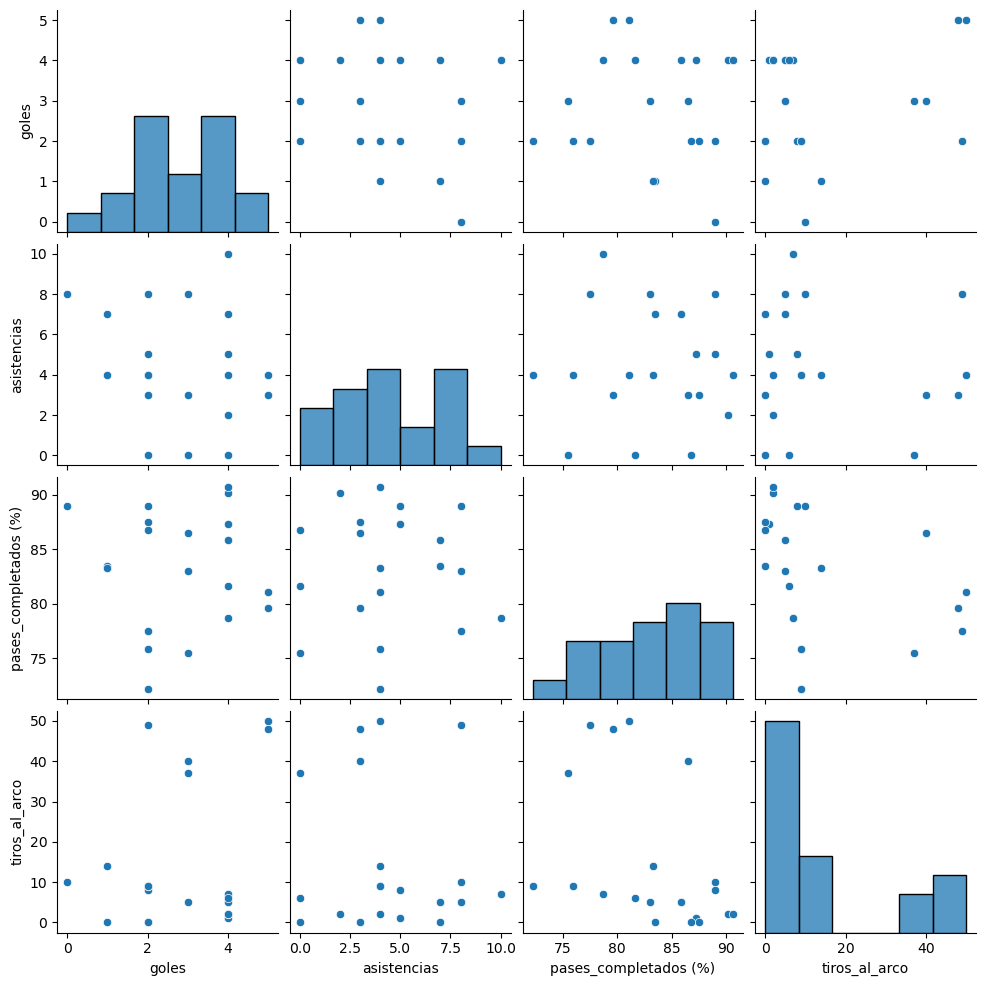

In [5]:
sns.pairplot(data=df_jugadores[
    ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']])

plt.show()

In [6]:
X = df_jugadores[['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']]

In [9]:
kmeans = KMeans(n_clusters=3, random_state=42)

In [10]:
kmeans

KMeans(n_clusters=3, random_state=42)

In [11]:
df_jugadores['cluster'] = kmeans.fit_predict(X)
df_jugadores.head()

,jugador_id,nombre,posición,edad,partidos_jugados,goles,asistencias,pases_completados (%),tiros_al_arco,precisión_tiros (%),minutos_jugados,cluster
0,1,Tara Alvarez,Portero,18,25,2,5,89.0,8,78.2,2125,1
1,2,Carol Mcclain,Mediocampista,32,12,2,8,77.5,49,68.5,1032,0
2,3,Robert Martin,Defensa,26,12,4,5,87.3,1,71.4,816,1
3,4,Mr. Robert Turner,Defensa,25,17,2,4,75.9,9,35.8,1496,2
4,5,Christopher Kennedy,Defensa,35,23,1,7,83.5,0,0.0,2047,1


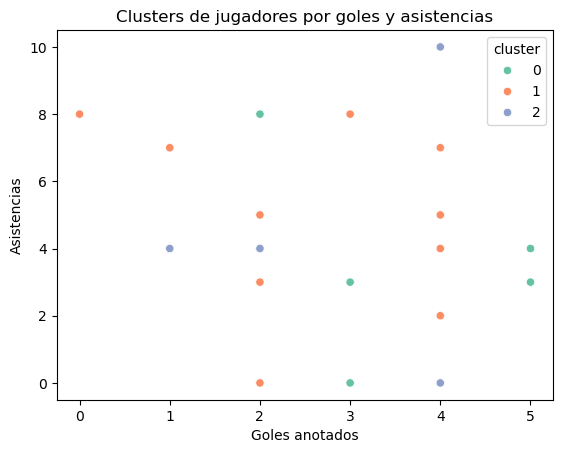

In [12]:
sns.scatterplot(x='goles', y='asistencias', hue='cluster', palette='Set2', data=df_jugadores)
plt.title("Clusters de jugadores por goles y asistencias")
plt.xlabel("Goles anotados")
plt.ylabel("Asistencias")
plt.show()


In [13]:
columnas_numericas = ['goles', 'asistencias', 'pases_completados (%)', 'tiros_al_arco']
perfiles = df_jugadores.groupby('cluster')[columnas_numericas].mean()
print(perfiles)


         goles  asistencias  pases_completados (%)  tiros_al_arco
cluster                                                          
0          3.6          3.6                  80.04           44.8
1          2.6          4.9                  87.29            3.3
2          2.6          4.4                  78.34            9.0


In [14]:
def clustering_interactivo(k):
    km = KMeans(n_clusters=k, random_state=42)
    df_jugadores['cluster_temp'] = km.fit_predict(X)
    
    sns.scatterplot(x='goles', y='asistencias', hue='cluster_temp', palette='Set1', data=df_jugadores)
    plt.title(f"Clustering jugadores con {k} clusters")
    plt.xlabel("Goles")
    plt.ylabel("Asistencias")
    plt.show()

widgets.interactive(clustering_interactivo, k=(2,6,1))

interactive(children=(IntSlider(value=4, description='k', max=6, min=2), Output()), _dom_classes=('widget-inte…